<a href="https://colab.research.google.com/github/arsalanrzp/Pattern-Recognition/blob/main/Incorrect_SOM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

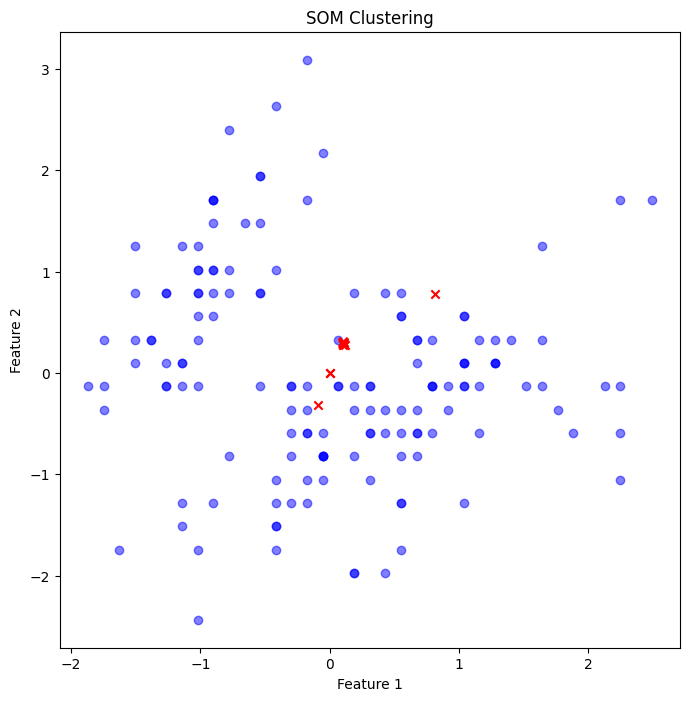

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
class SOM:
    def __init__(self, input_dim, output_dim, learning_rate=0.1, sigma=1.0):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.sigma = sigma

        # Initialize weights randomly
        self.weights = np.random.rand(output_dim[0], output_dim[1], input_dim)

    def find_best_matching_unit(self, input_vector):
        # Compute distances between input vector and all neurons
        distances = np.sum((self.weights - input_vector) ** 2, axis=(0, 1))

        # Find index of neuron with minimum distance
        bmu_index = np.unravel_index(np.argmin(distances), distances.shape)

        return bmu_index

    def update_weights(self, input_vector, bmu_index, iteration, num_iterations):
        # Calculate learning rate and neighborhood function
        alpha = self.learning_rate * (1 - iteration / num_iterations)
        sigma = self.sigma * (1 - iteration / num_iterations)

        # Calculate distance between each neuron and BMU
        distances = np.sum((np.indices(self.output_dim) - np.array(bmu_index).reshape(-1, 1, 1)) ** 2, axis=0)

        # Compute influence (neighborhood function)
        influence = np.exp(-distances / (2 * sigma ** 2))

        # Update weights
        delta_weights = alpha * influence[:, :, np.newaxis] * (input_vector - self.weights)
        self.weights += delta_weights


    def train(self, data, num_iterations):
        for i in range(num_iterations):
            for input_vector in data:
                bmu_index = self.find_best_matching_unit(input_vector)
                self.update_weights(input_vector, bmu_index, i, num_iterations)

    def visualize(self, data):
        plt.figure(figsize=(8, 8))
        plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
        for i in range(self.output_dim[0]):
            for j in range(self.output_dim[1]):
                plt.scatter(self.weights[i, j, 0], self.weights[i, j, 1], c='red', marker='x')
        plt.title('SOM Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

# Load Iris dataset
iris = datasets.load_iris()
data = iris.data
data = iris.data[:, :2]
labels = iris.target

# Normalize data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Define SOM parameters and train the SOM
input_dim = data.shape[1]
output_dim = (5, 5)  # SOM grid dimensions
num_iterations = 5000
learning_rate = 0.1
sigma = 1.0

som = SOM(input_dim, output_dim, learning_rate, sigma)
som.train(data, num_iterations)

# Visualize the SOM
som.visualize(data)
